# Imports and Environment Check

In [224]:
import geopandas as gpd
import pandas as pd
import rasterio
from rasterio .plot import show
from rasterio.mask import mask
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import contextily as ctx
import json
import fiona
import folium
from folium.features import GeoJsonTooltip
import numpy as np

# Loading Data
## Border

In [2]:
Nairobi = "../data/raw/Nairobi shapefile/Nairobi.shp"

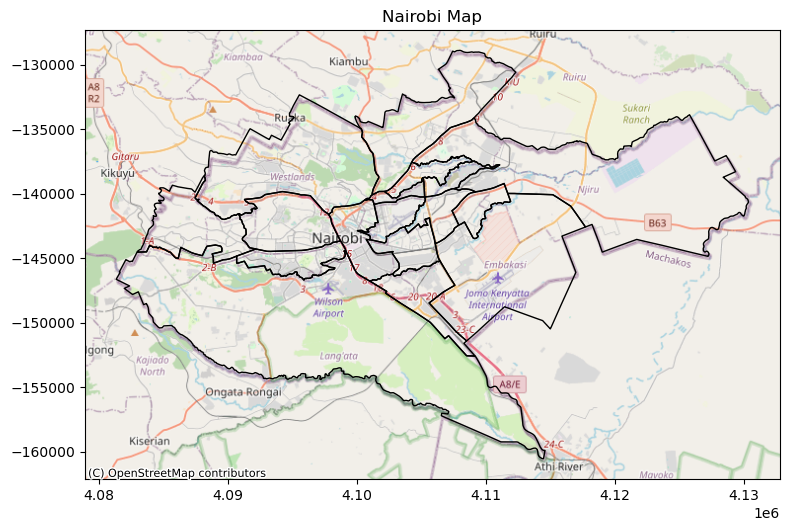

In [7]:
gdf_nairobi = gpd.read_file(Nairobi).to_crs(epsg = 3857)
ax = gdf_nairobi.plot(figsize=(8,8),edgecolor = "k", facecolor = "none")
ax.set_title("Nairobi Map")
ctx.add_basemap(ax,source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_nairobi.crs)
plt.tight_layout()
plt.savefig("../outputs/Nairobi.png", dpi=200)

In [125]:
gdf_nairobi

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,pop_sum,pop_mean
0,KEN.30.1_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Dagoretti North,NA,NA,Constituency,Constituency,275,NA,"POLYGON ((4.09e+06 -1.41e+05, 4.09e+06 -1.41e+...",16016.0,2669.333333
1,KEN.30.2_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Dagoretti South,NA,NA,Constituency,Constituency,276,NA,"POLYGON ((4.09e+06 -1.44e+05, 4.09e+06 -1.44e+...",NaN,NaN
2,KEN.30.3_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi Central,NA,NA,Constituency,Constituency,284,NA,"POLYGON ((4.11e+06 -1.43e+05, 4.11e+06 -1.43e+...",NaN,NaN
3,KEN.30.4_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi East,NA,NA,Constituency,Constituency,285,NA,"POLYGON ((4.12e+06 -1.44e+05, 4.12e+06 -1.44e+...",NaN,NaN
4,KEN.30.5_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi North,NA,NA,Constituency,Constituency,283,NA,"POLYGON ((4.11e+06 -1.4e+05, 4.11e+06 -1.4e+05...",NaN,NaN
5,KEN.30.6_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi South,NA,NA,Constituency,Constituency,282,NA,"POLYGON ((4.11e+06 -1.52e+05, 4.11e+06 -1.52e+...",NaN,NaN
6,KEN.30.7_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi West,NA,NA,Constituency,Constituency,286,NA,"POLYGON ((4.11e+06 -1.44e+05, 4.11e+06 -1.44e+...",NaN,NaN
7,KEN.30.8_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kamukunji,NA,NA,Constituency,Constituency,288,NA,"POLYGON ((4.1e+06 -1.43e+05, 4.1e+06 -1.44e+05...",NaN,NaN
8,KEN.30.9_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kasarani,NA,NA,Constituency,Constituency,280,NA,"POLYGON ((4.12e+06 -1.37e+05, 4.12e+06 -1.37e+...",NaN,NaN
9,KEN.30.10_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kibra,NA,NA,Constituency,Constituency,278,NA,"POLYGON ((4.1e+06 -1.46e+05, 4.1e+06 -1.46e+05...",NaN,NaN


##  Facilities

In [8]:
place_name = "Nairobi, Kenya"

In [22]:
tags = {"amenity": ["hospital", "clinis", "doctor", "pharmacy"]}
health_facilities = ox.features_from_place(place_name,tags)

In [23]:
health_facilities

geometry  \
element id                                                              
node    275554473                              POINT (36.812 -1.2638)   
        494148940                              POINT (36.777 -1.2598)   
        612004553                              POINT (36.783 -1.3144)   
        612004989                              POINT (36.792 -1.3106)   
        612006973                              POINT (36.793 -1.3118)   
...                                                               ...   
way     1098773839  POLYGON ((36.786 -1.2599, 36.786 -1.2599, 36.7...   
        1284855298  POLYGON ((36.813 -1.3123, 36.813 -1.3123, 36.8...   
        1290048300  POLYGON ((36.772 -1.3077, 36.772 -1.3075, 36.7...   
        1290049656  POLYGON ((36.772 -1.3078, 36.773 -1.3074, 36.7...   
        1305447817  POLYGON ((36.783 -1.2241, 36.783 -1.2241, 36.7...   

                     amenity   healthcare                          name  \
element id                                                                
node    275554473   hospital     hospital           M. P. Shah Hospital   
        494148940   pharmacy          NaN                A B C Pharmacy   
        612004553   pharmacy     pharmacy              lakaside chemist   
        612004989   pharmacy     pharmacy             community chemist   
        612006973   pharmacy     pharmacy              Mwangaza Chemist   
...                      ...          ...                           ...   
way     1098773839  pharmacy     pharmacy         Pharmaplus Pharmacies   
        1284855298  hospital  counselling  Texas Cancer Centre, Nairobi   
        1290048300  hospital     hospital    Kianda 42 level 4 HOSPITAL   
        1290049656  hospital     hospital   Ushirika Kianda 42 Hospital   
        1305447817  hospital  counselling    Nairobi Adventist Hospital   

                   addr:city         addr:street contact:phone dispensing  \
element id                                                                  
node    275554473        NaN                 NaN           NaN        NaN   
        494148940    Nairobi  James Gichuru Road           NaN        NaN   
        612004553        NaN                 NaN    0714201192        yes   
        612004989        NaN                 NaN           NaN        yes   
        612006973        NaN                 NaN           NaN         no   
...                      ...                 ...           ...        ...   
way     1098773839       NaN                 NaN           NaN        yes   
        1284855298       NaN                 NaN           NaN        NaN   
        1290048300   Nairobi        Kibera Drive           NaN        NaN   
        1290049656   Nairobi        Kibera Drive           NaN        NaN   
        1305447817   Nairobi       Red Hill Road           NaN        NaN   

                   health_facility:exam_room health_facility:patients_per_day  \
element id                                                                      
node    275554473                        NaN                              NaN   
        494148940                        NaN                              NaN   
        612004553                        yes                               10   
        612004989                        NaN                              NaN   
        612006973                        NaN                              NaN   
...                                      ...                              ...   
way     1098773839                       NaN                              NaN   
        1284855298                       NaN                              NaN   
        1290048300                       NaN                              NaN   
        1290049656                       NaN                              NaN   
        1305447817                       NaN                              NaN   

                    ... medical_staff:description notes denomination  ref  \
el

In [24]:
health_facilities=health_facilities[['amenity','name','geometry']]

In [26]:
health_facilities=health_facilities.dropna(subset = "name")

In [27]:
health_facilities = health_facilities.reset_index()

In [28]:
health_facilities

,index,element,id,amenity,name,geometry
0,0,node,275554473,hospital,M. P. Shah Hospital,POINT (36.812 -1.2638)
1,1,node,494148940,pharmacy,A B C Pharmacy,POINT (36.777 -1.2598)
2,2,node,612004553,pharmacy,lakaside chemist,POINT (36.783 -1.3144)
3,3,node,612004989,pharmacy,community chemist,POINT (36.792 -1.3106)
4,4,node,612006973,pharmacy,Mwangaza Chemist,POINT (36.793 -1.3118)
...,...,...,...,...,...,...
713,713,way,1098773839,pharmacy,Pharmaplus Pharmacies,"POLYGON ((36.786 -1.2599, 36.786 -1.2599, 36.7..."
714,714,way,1284855298,hospital,"Texas Cancer Centre, Nairobi","POLYGON ((36.813 -1.3123, 36.813 -1.3123, 36.8..."
715,715,way,1290048300,hospital,Kianda 42 level 4 HOSPITAL,"POLYGON ((36.772 -1.3077, 36.772 -1.3075, 36.7..."
716,716,way,1290049656,hospital,Ushirika Kianda 42 Hospital,"POLYGON ((36.772 -1.3078, 36.773 -1.3074, 36.7..."


In [29]:
print(health_facilities.crs)

epsg:4326


In [30]:
health_facilities_proj = health_facilities.to_crs(epsg=32737)

In [31]:
health_facilities_proj["geometry"] = health_facilities_proj["geometry"].apply(lambda geom: geom.centroid if geom.geom_type in ["Polygon", "MultiPolygon"] else geom)

In [34]:
health_facilities = health_facilities_proj.to_crs(epsg=4326)

In [35]:
health_facilities

,index,element,id,amenity,name,geometry
0,0,node,275554473,hospital,M. P. Shah Hospital,POINT (36.812 -1.2638)
1,1,node,494148940,pharmacy,A B C Pharmacy,POINT (36.777 -1.2598)
2,2,node,612004553,pharmacy,lakaside chemist,POINT (36.783 -1.3144)
3,3,node,612004989,pharmacy,community chemist,POINT (36.792 -1.3106)
4,4,node,612006973,pharmacy,Mwangaza Chemist,POINT (36.793 -1.3118)
...,...,...,...,...,...,...
713,713,way,1098773839,pharmacy,Pharmaplus Pharmacies,POINT (36.786 -1.2599)
714,714,way,1284855298,hospital,"Texas Cancer Centre, Nairobi",POINT (36.814 -1.3123)
715,715,way,1290048300,hospital,Kianda 42 level 4 HOSPITAL,POINT (36.772 -1.3079)
716,716,way,1290049656,hospital,Ushirika Kianda 42 Hospital,POINT (36.773 -1.3077)


In [65]:
health_facilities.to_file("../data/processed/health_facilities.geojson", driver="GeoJSON")

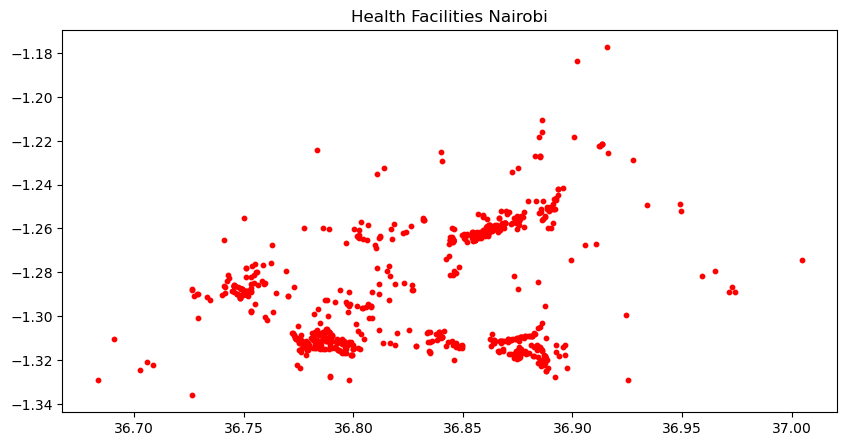

In [53]:
fig, ax = plt.subplots(figsize = (10,10))
health_facilities.plot(ax=ax, color="red",markersize=10)
plt.title("Health Facilities Nairobi")
plt.savefig("../outputs/medical_facilities.png", dpi=200)
plt.show()

In [46]:
health_facilities_web = health_facilities.to_crs(epsg=3857)

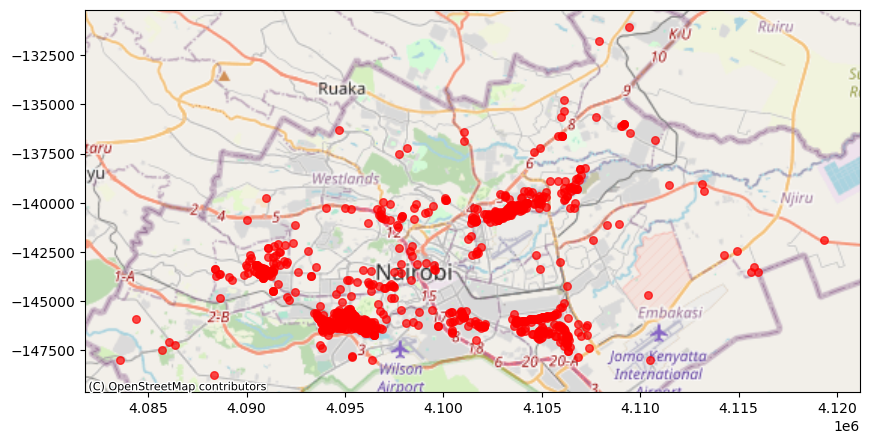

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
health_facilities_web.plot(ax=ax, color="red", markersize=30, alpha=0.7)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.savefig("../outputs/medical_facilities_basemap.png", dpi=200)

## Population

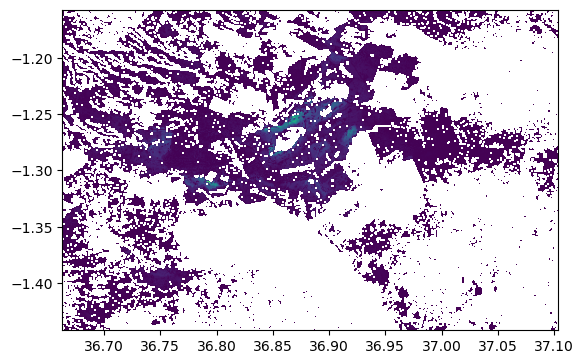

<Axes: >

In [145]:
pop_path = "../data/raw/KEN_msk_pop_tif/New_nai_pop1.tif"
population = rasterio.open(pop_path)
show(population)

In [146]:
population.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -99999.0,
 'width': 529,
 'height': 342,
 'count': 1,
 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'),
 'transform': Affine(0.0008333333299999957, 0.0, 36.662916535289,
        0.0, -0.0008333333299999955, -1.157083127115)}

In [191]:
constituency = gpd.read_file(Nairobi).to_crs(epsg = 3857)
constituency=constituency.to_crs(population.crs)

In [148]:
facilities = health_facilities.reset_index()
facilities = facilities.to_crs(population.crs)

In [197]:
stats = zonal_stats(
    constituency,
    "../data/raw/KEN_msk_pop_tif/New_nai_pop1.tif",
    stats=["mean","sum","count"]
)
constituency["pop_mean"]  = [s["mean"] for s in stats]
constituency["population"] = [s["sum"]  for s in stats]
constituency["cell_count"] = [s["count"] for s in stats]


In [198]:
print(stats[0])

{'mean': 70.61533460471567, 'count': 2884, 'sum': 203654.625}


In [202]:
constituency[["NAME_2", "population", "pop_mean", "cell_count"]].head()


,NAME_2,population,pop_mean,cell_count
0,Dagoretti North,203654.62500,70.615335,2884
1,Dagoretti South,371251.25000,128.238774,2895
2,Embakasi Central,292902.50000,306.063218,957
3,Embakasi East,378913.78125,92.036381,4117
4,Embakasi North,291210.68750,505.574110,576


In [204]:
constituency

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,pop_mean,population,cell_count
0,KEN.30.1_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Dagoretti North,NA,NA,Constituency,Constituency,275,NA,"POLYGON ((36.761 -1.2682, 36.761 -1.2681, 36.7...",70.615335,203654.625000,2884
1,KEN.30.2_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Dagoretti South,NA,NA,Constituency,Constituency,276,NA,"POLYGON ((36.754 -1.2918, 36.754 -1.2921, 36.7...",128.238774,371251.250000,2895
2,KEN.30.3_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi Central,NA,NA,Constituency,Constituency,284,NA,"POLYGON ((36.918 -1.2803, 36.918 -1.2805, 36.9...",306.063218,292902.500000,957
3,KEN.30.4_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi East,NA,NA,Constituency,Constituency,285,NA,"POLYGON ((36.976 -1.2916, 36.976 -1.2937, 36.9...",92.036381,378913.781250,4117
4,KEN.30.5_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi North,NA,NA,Constituency,Constituency,283,NA,"POLYGON ((36.894 -1.2556, 36.893 -1.2558, 36.8...",505.574110,291210.687500,576
5,KEN.30.6_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi South,NA,NA,Constituency,Constituency,282,NA,"POLYGON ((36.906 -1.361, 36.906 -1.3614, 36.90...",163.415561,263262.468750,1611
6,KEN.30.7_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi West,NA,NA,Constituency,Constituency,286,NA,"POLYGON ((36.886 -1.2923, 36.886 -1.2923, 36.8...",280.189410,302604.562500,1080
7,KEN.30.8_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kamukunji,NA,NA,Constituency,Constituency,288,NA,"POLYGON ((36.852 -1.289, 36.852 -1.2903, 36.85...",421.309018,310083.437500,736
8,KEN.30.9_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kasarani,NA,NA,Constituency,Constituency,280,NA,"POLYGON ((37.006 -1.2339, 37.007 -1.2338, 37.0...",36.865897,316383.125000,8582
9,KEN.30.10_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kibra,NA,NA,Constituency,Constituency,278,NA,"POLYGON ((36.8 -1.315, 36.8 -1.315, 36.8 -1.31...",260.639674,342480.531250,1314


In [205]:
facilities = facilities.to_crs(constituency.crs)

In [206]:
facilities_constituency = gpd.sjoin(
    facilities, constituency, how="left", predicate="within"
)

ValueError: cannot insert level_0, already exists

In [207]:
print(facilities.columns)

Index(['level_0', 'index', 'element', 'id', 'amenity', 'name', 'geometry'], dtype='object')


In [208]:
facilities = facilities.drop(columns=["level_0"], errors="ignore")

In [209]:
facilities_constituency = gpd.sjoin(
    facilities, constituency, how="left", predicate="within"
)

In [210]:
facilities_constituency

,index,element,id,amenity,name,geometry,index_right,GID_2,GID_0,COUNTRY,...,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,pop_mean,population,cell_count
0,0,node,275554473,hospital,M. P. Shah Hospital,POINT (36.812 -1.2638),16,KEN.30.17_1,KEN,Kenya,...,Westlands,NA,NA,Constituency,Constituency,274,NA,46.771619,287598.68750,6149
1,1,node,494148940,pharmacy,A B C Pharmacy,POINT (36.777 -1.2598),0,KEN.30.1_1,KEN,Kenya,...,Dagoretti North,NA,NA,Constituency,Constituency,275,NA,70.615335,203654.62500,2884
2,2,node,612004553,pharmacy,lakaside chemist,POINT (36.783 -1.3144),10,KEN.30.11_1,KEN,Kenya,...,Langata,NA,NA,Constituency,Constituency,277,NA,28.308749,215344.65625,7607
3,3,node,612004989,pharmacy,community chemist,POINT (36.792 -1.3106),9,KEN.30.10_1,KEN,Kenya,...,Kibra,NA,NA,Constituency,Constituency,278,NA,260.639674,342480.53125,1314
4,4,node,612006973,pharmacy,Mwangaza Chemist,POINT (36.793 -1.3118),9,KEN.30.10_1,KEN,Kenya,...,Kibra,NA,NA,Constituency,Constituency,278,NA,260.639674,342480.53125,1314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,713,way,1098773839,pharmacy,Pharmaplus Pharmacies,POINT (36.786 -1.2599),0,KEN.30.1_1,KEN,Kenya,...,Dagoretti North,NA,NA,Constituency,Constituency,275,NA,70.615335,203654.62500,2884
714,714,way,1284855298,hospital,"Texas Cancer Centre, Nairobi",POINT (36.814 -1.3123),10,KEN.30.11_1,KEN,Kenya,...,Langata,NA,NA,Constituency,Constituency,277,NA,28.308749,215344.65625,7607
715,715,way,1290048300,hospital,Kianda 42 level 4 HOSPITAL,POINT (36.772 -1.3079),9,KEN.30.10_1,KEN,Kenya,...,Kibra,NA,NA,Constituency,Constituency,278,NA,260.639674,342480.53125,1314
716,716,way,1290049656,hospital,Ushirika Kianda 42 Hospital,POINT (36.773 -1.3077),9,KEN.30.10_1,KEN,Kenya,...,Kibra,NA,NA,Constituency,Constituency,278,NA,260.639674,342480.53125,1314


In [213]:
facility_count = facilities_constituency.groupby(['NAME_2']).size().reset_index(name = "facility_count")

In [214]:
facility_count

,NAME_2,facility_count
0,Dagoretti North,45
1,Dagoretti South,61
2,Embakasi Central,2
3,Embakasi East,12
4,Embakasi North,17
5,Embakasi South,105
6,Embakasi West,5
7,Kamukunji,62
8,Kasarani,18
9,Kibra,151


In [216]:
constituency = constituency.merge(facility_count, on="NAME_2", how="left")

In [217]:
constituency["pop_per_facility"] = constituency["population"] / constituency["facility_count"].replace(0, None)

In [218]:
constituency

,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,pop_mean,population,cell_count,facility_count,pop_per_facility
0,KEN.30.1_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Dagoretti North,NA,NA,Constituency,Constituency,275,NA,"POLYGON ((36.761 -1.2682, 36.761 -1.2681, 36.7...",70.615335,203654.625000,2884,45,4525.658333
1,KEN.30.2_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Dagoretti South,NA,NA,Constituency,Constituency,276,NA,"POLYGON ((36.754 -1.2918, 36.754 -1.2921, 36.7...",128.238774,371251.250000,2895,61,6086.086066
2,KEN.30.3_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi Central,NA,NA,Constituency,Constituency,284,NA,"POLYGON ((36.918 -1.2803, 36.918 -1.2805, 36.9...",306.063218,292902.500000,957,2,146451.250000
3,KEN.30.4_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi East,NA,NA,Constituency,Constituency,285,NA,"POLYGON ((36.976 -1.2916, 36.976 -1.2937, 36.9...",92.036381,378913.781250,4117,12,31576.148438
4,KEN.30.5_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi North,NA,NA,Constituency,Constituency,283,NA,"POLYGON ((36.894 -1.2556, 36.893 -1.2558, 36.8...",505.574110,291210.687500,576,17,17130.040441
5,KEN.30.6_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi South,NA,NA,Constituency,Constituency,282,NA,"POLYGON ((36.906 -1.361, 36.906 -1.3614, 36.90...",163.415561,263262.468750,1611,105,2507.261607
6,KEN.30.7_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Embakasi West,NA,NA,Constituency,Constituency,286,NA,"POLYGON ((36.886 -1.2923, 36.886 -1.2923, 36.8...",280.189410,302604.562500,1080,5,60520.912500
7,KEN.30.8_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kamukunji,NA,NA,Constituency,Constituency,288,NA,"POLYGON ((36.852 -1.289, 36.852 -1.2903, 36.85...",421.309018,310083.437500,736,62,5001.345766
8,KEN.30.9_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kasarani,NA,NA,Constituency,Constituency,280,NA,"POLYGON ((37.006 -1.2339, 37.007 -1.2338, 37.0...",36.865897,316383.125000,8582,18,17576.840278
9,KEN.30.10_1,KEN,Kenya,KEN.30_1,Nairobi,NA,Kibra,NA,NA,Constituency,Constituency,278,NA,"POLYGON ((36.8 -1.315, 36.8 -1.315, 36.8 -1.31...",260.639674,342480.531250,1314,151,2268.082988


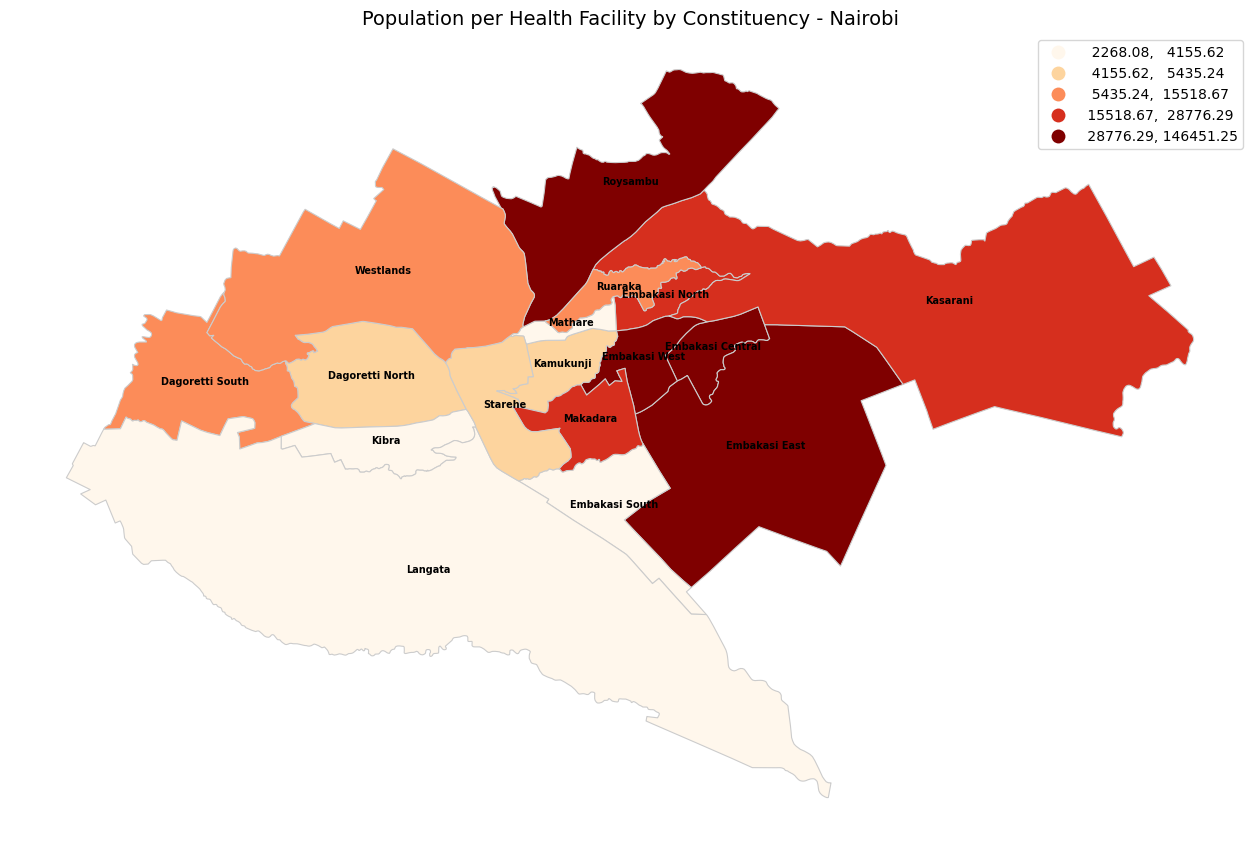

In [251]:
fig, ax = plt.subplots(figsize=(16, 16))
constituency.plot(
    column="pop_per_facility",
    cmap="OrRd",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    scheme="quantiles",  
    k=5, 
    ax=ax
)
for idx, row in constituency.iterrows():
    centroid = row.geometry.centroid
    ax.annotate(
        text=row["NAME_2"], 
        xy=(centroid.x, centroid.y),
        ha="center", fontsize=7, color="black", weight="bold"
    )
ax.set_title("Population per Health Facility by Constituency - Nairobi", fontsize=14)
ax.set_axis_off()
cax = fig.get_axes()[-1]
cax.set_ylabel("People per Facility", fontsize=12)
plt.savefig("../outputs/nairobi_facility_heatmap.png", dpi=300, bbox_inches="tight")

In [229]:
constituency_wgs = constituency.to_crs(epsg=4326)
facilities_wgs = facilities.to_crs(epsg=4326)

m = folium.Map(location=[-1.29, 36.82], zoom_start=11, tiles="cartodbpositron")

folium.Choropleth(
    geo_data=constituency_wgs,
    data=constituency_wgs,
    columns=["NAME_2", "pop_per_facility"],
    key_on="feature.properties.NAME_2",
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.5,
    nan_fill_color="lightgrey",
    legend_name="People per Facility"
).add_to(m)

folium.GeoJson(
    constituency_wgs,
    style_function=lambda x: {"color":"transparent","fillOpacity":0},
    tooltip=GeoJsonTooltip(fields=["NAME_2","population","facility_count","pop_per_facility"])
).add_to(m)

for _, row in facilities_wgs.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        color="black",
        fill=True,
        fill_opacity=0.8
    ).add_to(m)

m